# SMS Spam or Ham Analyzing and Classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
import plotly.express as px
import nltk

In [2]:
sns.set_theme(color_codes=True)
sns.set_style('whitegrid')
%matplotlib inline
init_notebook_mode(connected=True)
cf.go_offline()

In [3]:
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [4]:
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

In [5]:
print(len(messages))

5574


In [6]:
messages[50]

'ham\tWhat you thinked about me. First time you saw me in class.'

In [7]:
for mess_no, message in enumerate(messages[:10]):
    print(mess_no,message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

In [8]:
df = pd.read_csv('smsspamcollection/SMSSpamCollection', sep = '\t', names = ['label','message'] )

In [9]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [11]:
df.groupby('label').describe().transpose()

label                              ham  \
message count                     4825   
        unique                    4516   
        top     Sorry, I'll call later   
        freq                        30   

label                                                        spam  
message count                                                 747  
        unique                                                653  
        top     Please call our customer service representativ...  
        freq                                                    4

In [12]:
df['length'] = df['message'].apply(len)

In [13]:
df.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


<AxesSubplot:xlabel='label', ylabel='count'>

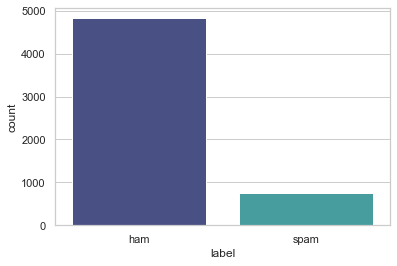

In [14]:
sns.countplot(data = df, x = 'label', palette = 'mako')

<AxesSubplot:xlabel='length', ylabel='Count'>

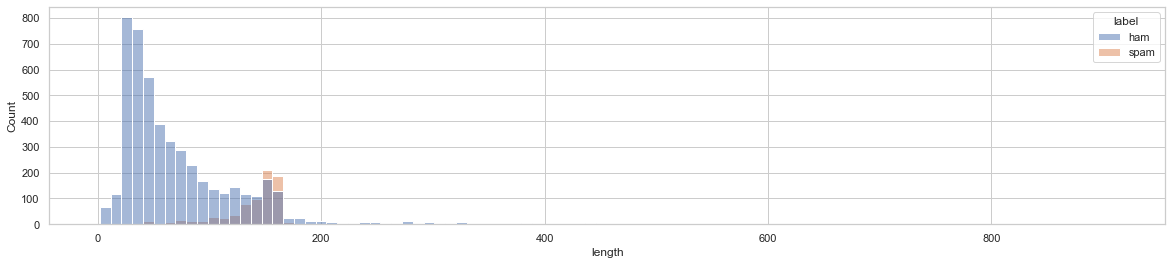

In [15]:
plt.figure(figsize=(20,4))
sns.histplot(data=df, x = 'length' , hue = 'label' )

In [16]:
df['Length of ham'] = df[df['label']=='ham']['length']
df['Length of Spam'] = df[df['label']=='spam']['length']

df[['Length of ham', 'Length of Spam']].iplot(kind='hist')

In [17]:
df.drop(['Length of ham','Length of Spam'],axis=1,inplace=True)

In [18]:
df.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [19]:
import string

In [20]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [21]:
msg = "Sample message! Notice: It has punctuation."

In [22]:
nopunc = [c for c in msg if c not in string.punctuation]

In [23]:
nopunc

['S',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'm',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 ' ',
 'N',
 'o',
 't',
 'i',
 'c',
 'e',
 ' ',
 'I',
 't',
 ' ',
 'h',
 'a',
 's',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n']

In [24]:
nopunc = ''.join(nopunc)

In [25]:
nopunc

'Sample message Notice It has punctuation'

In [26]:
from nltk.corpus import stopwords

In [27]:
#stopwords.words('english')

In [28]:
nopunc.split()

['Sample', 'message', 'Notice', 'It', 'has', 'punctuation']

In [29]:
clean_msg = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [30]:
clean_msg

['Sample', 'message', 'Notice', 'punctuation']

In [31]:
def text_process(msg):
    """
    1.remove punc
    2.remove stopwords(frequently used words, have no such meanings)
    3.return list of clean words
    """
    nopunc = [c for c in msg if c not in string.punctuation]
    
    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]


In [32]:
df.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [33]:
df['message'].head().apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [34]:
from sklearn.feature_extraction.text import CountVectorizer

In [35]:
BOW_transformer = CountVectorizer(analyzer=text_process).fit(df['message'])

In [36]:
BOW_msgs = BOW_transformer.transform(df['message'])

In [37]:
from sklearn.feature_extraction.text import TfidfTransformer

In [38]:
tfidf_msgs = TfidfTransformer().fit_transform(BOW_msgs)

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.3, random_state=101)

In [41]:
from sklearn.naive_bayes import MultinomialNB

In [42]:
from sklearn.pipeline import Pipeline

In [43]:
spam_detector = Pipeline([
                        ('bow',CountVectorizer(analyzer=text_process)),
                        ('tfidf',TfidfTransformer()),
                        ('classifier',MultinomialNB())
                        ])

In [44]:
spam_detector.fit(X_train,y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x0000023EFB5B55E0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [45]:
preds = spam_detector.predict(X_test)

In [46]:
from sklearn.metrics import classification_report,plot_confusion_matrix

In [47]:
print(classification_report(preds,y_test))

              precision    recall  f1-score   support

         ham       1.00      0.96      0.98      1543
        spam       0.65      1.00      0.79       129

    accuracy                           0.96      1672
   macro avg       0.83      0.98      0.88      1672
weighted avg       0.97      0.96      0.96      1672



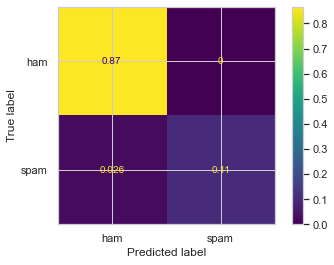

In [48]:
plot_confusion_matrix(spam_detector,df['message'],df['label'],normalize='all')

In [49]:
new_msg = ['Invite your Loved ones on MyTelenor App & Get Free MBs for Everyone on EVERY App Install. Hurry & download app to Win Free MBs. Link http://onelink.to/bke4rb']
spam_detector.predict(new_msg)

array(['spam'], dtype='<U4')